In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.io import mmread
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
read_path = '../write_data/write_data'

In [21]:
!mkdir ../write_data/combined_analysis
write_path = '../write_data/combined_analysis'

In [5]:
df_donor_T_top_genes = pd.read_csv(f'{read_path}_donor_T/NPC_NLH_donor_T_top_genes.tsv', sep='\t',index_col=0)
df_donor_B_top_genes = pd.read_csv(f'{read_path}_donor_B/NPC_NLH_donor_B_top_genes.tsv', sep='\t',index_col=0)

In [4]:
df_donor_T_top_genes

,condition,RARG,ZBTB6,ZSCAN29,NR2C2,ZBTB33,ZNF354A,HIC2,KLF7,ZNF684,...,ZNF211,ZNF669,ZNF324,LBX2,ATF6,SOX9,TEAD1,SOX8,HOXB6,NFYB
patient_ID,,,,,,,,,,,,,,,,,,,,,
1,NPC,34.0,47.0,18.0,48.0,56.0,51.0,15.0,18.0,28.0,...,78.0,74.0,51.0,1.0,114.0,0.0,1.0,0.0,0.0,116.0
2,NPC,36.0,81.0,39.0,138.0,76.0,58.0,27.0,59.0,59.0,...,93.0,86.0,86.0,3.0,197.0,3.0,0.0,1.0,4.0,298.0
3,NPC,47.0,67.0,26.0,73.0,55.0,41.0,18.0,41.0,37.0,...,91.0,55.0,55.0,1.0,164.0,3.0,2.0,2.0,1.0,238.0
4,NPC,36.0,41.0,32.0,63.0,52.0,35.0,8.0,35.0,42.0,...,49.0,59.0,41.0,2.0,131.0,2.0,1.0,0.0,1.0,125.0
5,NPC,50.0,42.0,24.0,89.0,59.0,32.0,14.0,26.0,45.0,...,48.0,66.0,44.0,2.0,105.0,5.0,0.0,2.0,1.0,179.0
9,NPC,173.0,170.0,116.0,281.0,186.0,263.0,76.0,290.0,168.0,...,345.0,302.0,309.0,11.0,556.0,346.0,0.0,1.0,7.0,635.0
10,NPC,94.0,101.0,54.0,174.0,105.0,114.0,38.0,90.0,119.0,...,135.0,203.0,192.0,9.0,352.0,7.0,1.0,0.0,3.0,332.0
11,NLH,122.0,53.0,29.0,99.0,82.0,120.0,63.0,50.0,61.0,...,138.0,185.0,171.0,4.0,289.0,1.0,3.0,3.0,0.0,194.0
12,NLH,136.0,71.0,33.0,103.0,92.0,72.0,34.0,50.0,69.0,...,162.0,159.0,168.0,0.0,255.0,0.0,3.0,5.0,1.0,269.0


In [6]:
df_donor_B_top_genes

,condition,NR1D1,ZNF16,ZNF701,HIC2,ESRRA,ETV3,NFYA,POU6F1,FOXO4,...,TFAP2A,RREB1,HOXB6,SOX15,HESX1,TEAD3,SOX2,KLF1,BARX2,VENTX
patient_ID,,,,,,,,,,,,,,,,,,,,,
1,NPC,14.0,19.0,32.0,16.0,23.0,50.0,55.0,12.0,5.0,...,2.0,52.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NPC,64.0,35.0,57.0,37.0,58.0,57.0,92.0,17.0,13.0,...,3.0,86.0,5.0,0.0,1.0,4.0,2.0,1.0,2.0,1.0
3,NPC,20.0,11.0,40.0,22.0,26.0,45.0,42.0,7.0,8.0,...,0.0,37.0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0
4,NPC,84.0,54.0,163.0,38.0,98.0,162.0,136.0,23.0,21.0,...,8.0,199.0,2.0,0.0,1.0,2.0,4.0,3.0,2.0,1.0
5,NPC,21.0,29.0,95.0,22.0,51.0,44.0,70.0,6.0,10.0,...,3.0,114.0,3.0,1.0,2.0,2.0,2.0,2.0,0.0,3.0
9,NPC,95.0,75.0,188.0,59.0,113.0,229.0,213.0,31.0,20.0,...,7.0,252.0,6.0,2.0,4.0,1.0,1.0,1.0,5.0,2.0
10,NPC,58.0,60.0,161.0,36.0,78.0,114.0,150.0,24.0,20.0,...,5.0,168.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0
11,NLH,80.0,62.0,122.0,47.0,44.0,133.0,130.0,17.0,17.0,...,0.0,157.0,1.0,2.0,4.0,1.0,1.0,0.0,0.0,0.0
12,NLH,141.0,123.0,229.0,94.0,165.0,279.0,324.0,28.0,39.0,...,4.0,356.0,2.0,4.0,6.0,2.0,2.0,0.0,0.0,1.0


In [11]:
# add total_counts column, total_counts = sum of counts of all genes
df_donor_T_top_genes['total_counts'] = df_donor_T_top_genes.sum(axis=1)
df_donor_B_top_genes['total_counts'] = df_donor_B_top_genes.sum(axis=1)

# sum the counts of the top genes for condition NPC and NLH, normalize each gene
df_donor_T_top_genes_heatmap = df_donor_T_top_genes.groupby('condition').sum()
df_donor_B_top_genes_heatmap = df_donor_B_top_genes.groupby('condition').sum()

# normalize each gene by dividing each gene by total_counts
df_donor_T_top_genes_heatmap = df_donor_T_top_genes_heatmap.div(df_donor_T_top_genes_heatmap['total_counts'], axis=0)
df_donor_B_top_genes_heatmap = df_donor_B_top_genes_heatmap.div(df_donor_B_top_genes_heatmap['total_counts'], axis=0)

# drop total_counts column
df_donor_T_top_genes_heatmap = df_donor_T_top_genes_heatmap.drop(columns=['total_counts'])
df_donor_B_top_genes_heatmap = df_donor_B_top_genes_heatmap.drop(columns=['total_counts'])

# normalize each gene by dividing each gene by the sum of the column
df_donor_T_top_genes_heatmap = df_donor_T_top_genes_heatmap.div(df_donor_T_top_genes_heatmap.sum(axis=0), axis=1)
df_donor_B_top_genes_heatmap = df_donor_B_top_genes_heatmap.div(df_donor_B_top_genes_heatmap.sum(axis=0), axis=1)

/var/folders/ms/kqznsr6n6934_wtng0twy8dw0000gn/T/ipykernel_17503/2046305373.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_donor_T_top_genes['total_counts'] = df_donor_T_top_genes.sum(axis=1)
/var/folders/ms/kqznsr6n6934_wtng0twy8dw0000gn/T/ipykernel_17503/2046305373.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_donor_B_top_genes['total_counts'] = df_donor_B_top_genes.sum(axis=1)


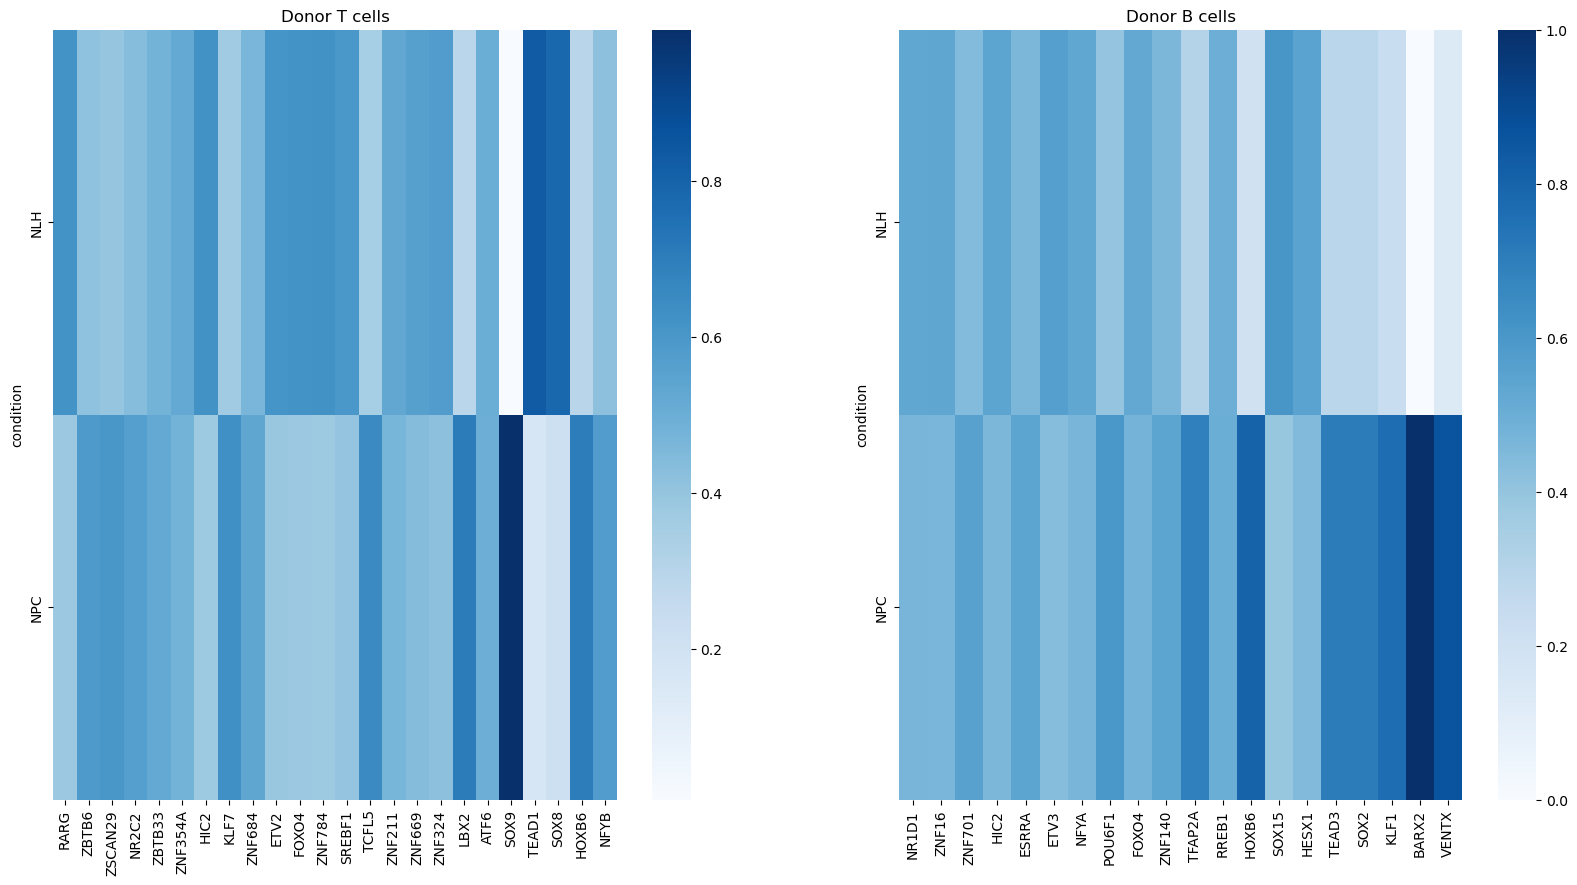

In [22]:
# heatmap of top genes for donor T cells and donor B cells
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.heatmap(df_donor_T_top_genes_heatmap, ax=ax[0], cmap='Blues')
sns.heatmap(df_donor_B_top_genes_heatmap, ax=ax[1], cmap='Blues')
ax[0].set_title('Donor T cells')
ax[1].set_title('Donor B cells')
plt.savefig(f'{write_path}/donor_T_B_top_genes_heatmap.png')
plt.show()